# Requirments

scikit-learn == 0.24.1  
matplotlib   == 3.3.4

In [39]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [40]:
# load raw FinTech data
path_data = './data/Fintech_daily_data.csv'
df = pd.read_csv(path_data)
df.describe()

,DXYUSD_Open,DXYUSD_High,DXYUSD_Low,DXYUSD_Close,DXYUSD_AdjClose,DXYUSD_Volume,World_Index_Open,World_Index_High,World_Index_Low,World_Index_Close,...,TNXTbill_Open,TNXTbill_High,TNXTbill_Low,TNXTbill_Close,TNXTbill_AdjClose,TNXTbill_Volume,BTC_Price,BTC_market_cap,BTC_volume,Sentiment_24h
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1.917000e+03,1933.000000,1933.000000,1933.000000,1933.000000,...,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.0,2803.000000,2.802000e+03,2.803000e+03,2805.000000
mean,93.021101,93.325806,92.748701,93.043193,93.043193,1.214919e+04,80.024273,80.360797,79.595173,79.982856,...,2.145511,2.169513,2.121338,2.145574,2.145574,0.0,4125.471133,7.230983e+10,7.606231e+09,0.418845
std,6.427827,6.443005,6.370153,6.410710,6.410710,3.856245e+05,11.289516,11.293338,11.294457,11.299139,...,0.639394,0.637413,0.639804,0.637501,0.637501,0.0,4721.972529,8.543778e+10,1.270574e+10,0.396992
min,79.139999,79.239998,78.910004,79.139999,79.139999,0.000000e+00,59.000000,59.000000,58.980000,59.000000,...,0.484000,0.538000,0.398000,0.499000,0.499000,0.0,67.809000,7.713681e+08,0.000000e+00,-1.083872
25%,90.250000,90.570000,90.010002,90.320000,90.320000,0.000000e+00,71.129997,71.379997,70.709999,71.040001,...,1.817000,1.842000,1.786000,1.815000,1.815000,0.0,416.802000,5.835826e+09,6.412286e+07,0.148308
50%,95.169998,95.500000,94.910004,95.150002,95.150002,0.000000e+00,76.500000,76.970001,76.000000,76.620003,...,2.271000,2.293000,2.243000,2.268000,2.268000,0.0,1082.016823,1.710097e+10,1.275837e+09,0.214014
75%,97.410004,97.680000,97.160004,97.419998,97.419998,0.000000e+00,89.190002,89.489998,88.739998,89.190002,...,2.610000,2.631000,2.585000,2.605000,2.605000,0.0,7534.740259,1.330727e+11,6.834460e+09,0.620860
max,103.260002,103.820000,103.029999,103.290001,103.290001,1.429000e+07,112.940002,112.940002,112.290001,112.410004,...,3.239000,3.248000,3.233000,3.234000,3.234000,0.0,29022.418395,5.394380e+11,8.140669e+10,4.667784


# Handling missing value and Feature engineering

In [41]:
# remove rows with empty values
df.dropna(inplace=True)
df.describe()

,DXYUSD_Open,DXYUSD_High,DXYUSD_Low,DXYUSD_Close,DXYUSD_AdjClose,DXYUSD_Volume,World_Index_Open,World_Index_High,World_Index_Low,World_Index_Close,...,TNXTbill_Open,TNXTbill_High,TNXTbill_Low,TNXTbill_Close,TNXTbill_AdjClose,TNXTbill_Volume,BTC_Price,BTC_market_cap,BTC_volume,Sentiment_24h
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1.914000e+03,1914.000000,1914.000000,1914.000000,1914.000000,...,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.0,1914.000000,1.914000e+03,1.914000e+03,1914.000000
mean,93.027957,93.332435,92.755319,93.049765,93.049765,1.216823e+04,79.997738,80.335481,79.567205,79.956865,...,2.145385,2.169404,2.121249,2.145509,2.145509,0.0,4099.635902,7.183183e+10,7.692876e+09,0.421149
std,6.427832,6.443079,6.370284,6.410779,6.410779,3.859264e+05,11.252597,11.256787,11.257036,11.262245,...,0.639717,0.637739,0.640107,0.637803,0.637803,0.0,4673.566240,8.452504e+10,1.285617e+10,0.395252
min,79.139999,79.239998,78.910004,79.139999,79.139999,0.000000e+00,59.000000,59.000000,58.980000,59.000000,...,0.484000,0.538000,0.398000,0.499000,0.499000,0.0,76.391500,8.700820e+08,0.000000e+00,-0.126262
25%,90.269997,90.589996,90.062498,90.324999,90.324999,0.000000e+00,71.122501,71.379997,70.702497,71.045000,...,1.816250,1.842250,1.786500,1.815000,1.815000,0.0,416.865000,5.806414e+09,7.005387e+07,0.145776
50%,95.174999,95.510002,94.915001,95.155003,95.155003,0.000000e+00,76.490002,76.940002,75.990002,76.610000,...,2.271000,2.293500,2.244000,2.268000,2.268000,0.0,1076.184290,1.706444e+10,1.257546e+09,0.210078
75%,97.417500,97.680000,97.160004,97.419998,97.419998,0.000000e+00,89.187502,89.487499,88.699997,89.157503,...,2.610000,2.631000,2.584250,2.605000,2.605000,0.0,7596.436701,1.330727e+11,7.143630e+09,0.618245
max,103.260002,103.820000,103.029999,103.290001,103.290001,1.429000e+07,112.940002,112.940002,112.290001,112.410004,...,3.239000,3.248000,3.233000,3.234000,3.234000,0.0,28837.288529,5.359673e+11,8.140669e+10,4.652801


In [42]:
# Divide the data set into inputs and outputs
df_input = df.drop(['BTC_Price', 'BTC_market_cap', 'BTC_volume', 'Date'], axis=1)
df_ouput = df[['BTC_Price']]
df_input.shape, df_ouput.shape

((1914, 61), (1914, 1))

In [43]:
# remove volume data
removed_col = [col for col in df_input.columns if 'Volume' in col]
df_input = df_input.drop(removed_col, axis=1)
del removed_col
df_input.shape

(1914, 51)

In [44]:
# using gain rate to replca Open and Close
columns = df_input.columns
for name in columns:
    if name[-4:] == "Open":
        index_name = name[:-4]
        df_input[index_name+'Gain_Rate'] = (df_input[index_name+"Close"] - df_input[name]) / df_input[name]
        # remove Open and Close
        df_input = df_input.drop([index_name+"Close", name], axis=1)
        # remove High and Low
        df_input = df_input.drop([index_name+"High", index_name+"Low"], axis=1)
        # remove AdjClose
        df_input = df_input.drop([index_name+"AdjClose"], axis=1)
        
del columns
df_input.head()

,Sentiment_24h,DXYUSD_Gain_Rate,World_Index_Gain_Rate,GoldUSD_Gain_Rate,Silver_Gain_Rate,DBCCommodity_Gain_Rate,DJCI_Gain_Rate,CrudeOil_Gain_Rate,SPY_Gain_Rate,VIX_Gain_Rate,TNXTbill_Gain_Rate
0,0.188838,0.001341,0.003931,0.006341,0.006341,0.008765,0.019090,0.019418,0.003971,-0.000729,0.003007
1,0.169673,-0.005234,0.007311,-0.014732,-0.014732,-0.007181,-0.001202,-0.010167,0.002574,-0.013858,0.014537
2,0.131704,-0.000857,0.000000,-0.038969,-0.038969,-0.000387,-0.002442,-0.022024,-0.006590,0.043948,-0.011460
3,0.128927,0.007229,0.004812,0.009762,0.009762,0.008491,0.029350,0.032857,0.006743,-0.061464,-0.007304
4,0.157061,-0.001460,-0.012230,0.009474,0.009474,0.001896,-0.000804,0.017236,0.001427,-0.005418,0.076829


In [7]:
# return rate
df_ouput['Return'] = df_ouput['BTC_Price'].diff(1) / df_ouput['BTC_Price'].shift(1)
# df_ouput['Return'] = df_ouput['BTC_Price'].diff(1)
df_ouput = df_ouput.drop(['BTC_Price'], axis=1)
df_ouput.head()
# removed NAN line
df_ouput = df_ouput.drop(df_ouput.index[0], axis=0)
df_input = df_input.drop(df_input.index[0], axis=0)

<ipython-input-7-698416e37a30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ouput['Return'] = df_ouput['BTC_Price'].diff(1) / df_ouput['BTC_Price'].shift(1)


,Return
0,NaN
1,-0.046915
2,-0.135255
3,-0.115983
4,-0.120081


In [62]:
# append y(t-1) and y(t-2) to x
df_input['BTC_Price(t-1)'] = df_ouput['BTC_Price']
df_input['BTC_Price(t-2)'] = df_ouput['BTC_Price'].shift(1)
# if using y(t-2) must removed NAN line
df_ouput = df_ouput.drop(df_ouput.index[0], axis=0)
df_input = df_input.drop(df_input.index[0], axis=0)
df_input.shape

(1910, 13)

In [64]:
# using X(i-1) to predict Y(i)
df_ouput = df_ouput.drop(df_ouput.index[0], axis=0)
df_input = df_input.drop(df_input.index[-1], axis=0)
df_input.shape, df_ouput.shape

((1909, 13), (1909, 1))

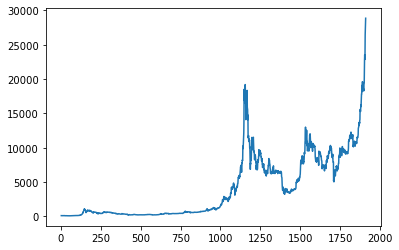

In [65]:
plt.plot(df_ouput)

In [66]:
# reset index and don't reserve original index
df_ouput = df_ouput.reset_index(drop=True)
df_input = df_input.reset_index(drop=True)
# save data to ./data
new_df = pd.concat([df_input, df_ouput], axis=1)
new_df.to_csv('./data/FinTech.csv', encoding='utf-8', index=0)